# Premier league season 2022-23 match data analysis

Author: Chenzhang Zhao chenzz1@uci.edu

Course Project, UC Irvine, Math 10, S23

## Introduction

Introduce your project here.  Maybe 3 sentences.

As a soccer fan who has been watching English premier league for over ten years, I am interested in discovering the correlation between match statitics and the win/loss of a team. By studying the data gathered from previous matches, I am also hoping to analyze the style of some particular teams and predict their future performances. In my project, I delve into the match statitics for premier league in the past season (2022-23) to demonstrate the overall team performance and pay attention to details of a few particular teams to analyze their records throughout the whole season. By implementing a number of methods learned in Math 10 and some outside resources, I try to elaborate by process step by step and introduce visualization skills to better show the outcome.

## Main project

You can either have all one section or divide into multiple sections.  To make new sections, use `##` in a markdown cell.  Double-click this cell for an example of using `##`

In the first part I would import all the python libraries needed.

In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

## Files reading

We first want to read each file and take a look at what they look like.

In [2]:
df_home = pd.read_csv("2023_home_teams_stats.csv")

In [3]:
df_matchday = pd.read_csv("2023_matchday_results.csv")

In [4]:
df_standing = pd.read_csv("2023_PL_standings.csv")

In [5]:
df_home.sample(5)

,fixture id,Home team id,Home team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
183,868129,49,Chelsea,2.0,3.0,8,3.0,6.0,2.0,9,3.0,2.0,48%,2.0,NaN,2.0,553,471,85%,NaN
286,868232,50,Manchester City,8.0,3.0,17,6.0,14.0,3.0,9,7.0,3.0,68%,1.0,NaN,NaN,754,692,92%,2.96
1,867947,36,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,4.0,4.0,33%,2.0,NaN,1.0,294,181,62%,NaN
165,868111,45,Everton,6.0,4.0,12,2.0,7.0,5.0,9,2.0,1.0,58%,1.0,NaN,2.0,505,427,85%,NaN
151,868097,51,Brighton,2.0,1.0,7,4.0,4.0,3.0,14,11.0,3.0,65%,2.0,NaN,NaN,526,454,86%,NaN


In [6]:
df_matchday

,Unnamed: 0,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away
0,0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2
1,1,867947,2022-08-06T11:30:00+00:00,36,Fulham,NaN,40,Liverpool,NaN,2,2
2,2,867948,2022-08-06T14:00:00+00:00,35,Bournemouth,True,66,Aston Villa,False,2,0
3,3,867949,2022-08-06T14:00:00+00:00,63,Leeds,True,39,Wolves,False,2,1
4,4,867950,2022-08-07T13:00:00+00:00,46,Leicester,NaN,55,Brentford,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...
375,375,868321,2023-05-28T15:30:00+00:00,45,Everton,True,35,Bournemouth,False,1,0
376,376,868322,2023-05-28T15:30:00+00:00,63,Leeds,False,47,Tottenham,True,1,4
377,377,868323,2023-05-28T15:30:00+00:00,46,Leicester,True,48,West Ham,False,2,1
378,378,868324,2023-05-28T15:30:00+00:00,33,Manchester United,True,36,Fulham,False,2,1


In [7]:
df_standing

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30
5,6,62,19,51,Brighton,38,18,8,12,72,...,4,5,37,21,19,8,4,7,35,32
6,7,61,5,66,Aston Villa,38,18,7,13,51,...,2,5,33,21,19,6,5,8,18,25
7,8,60,7,47,Tottenham,38,18,6,14,70,...,1,6,37,25,19,6,5,8,33,38
8,9,59,12,55,Brentford,38,15,14,9,58,...,7,2,35,18,19,5,7,7,23,28
9,10,52,2,36,Fulham,38,15,7,16,55,...,5,6,31,29,19,7,2,10,24,24


## Overall Team Status

I want to demonstrate each team's overall performance in a season.

I noticed that the column name "team.name" might cause parsing issues with altair, so I renamed it to "team_name" for future convenience.

In [8]:
df_standing = df_standing.rename(columns={'team.name': 'team_name'})

Here, to visualize clearly the final points for each team, I draw an altair chart to show the relation between points and ranking, with tooltip showing each team's name. 

In [9]:
df_final_ranking_dataframe = df_standing[['rank', 'points']].copy()
df_final_ranking_dataframe

,rank,points
0,1,89
1,2,84
2,3,75
3,4,71
4,5,67
5,6,62
6,7,61
7,8,60
8,9,59
9,10,52


Using seaborn as an extra part, I plot the final points data using scatterplot according to the team's final ranking. The plot is increasing beacuse the higher the ranking is, the higher the final point is.
I also use altair in this case because it is easier to use a tooltip.

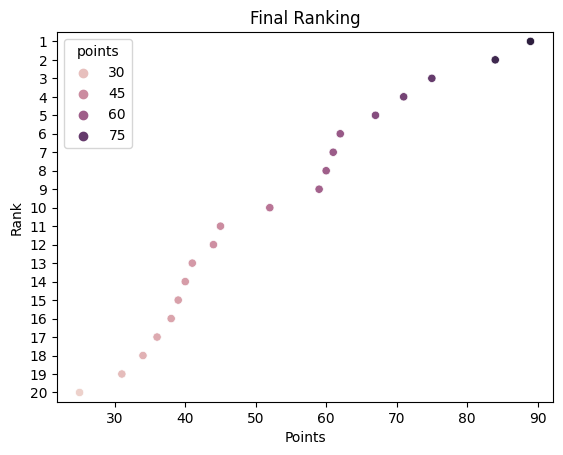

In [10]:
sns.scatterplot(data=df_final_ranking_dataframe, x='points', y='rank', hue='points')
plt.xlabel('Points')
plt.ylabel('Rank')
plt.title('Final Ranking')
plt.gca().invert_yaxis()

# Set the y-axis limits and tick labels
plt.ylim(20.5, 0.5)
plt.yticks(list(range(20, 0, -1)))

# Show the plot
plt.show()

In [11]:
df_final_ranking = alt.Chart(df_final_ranking_dataframe).mark_circle().encode(
    x=alt.X("points:Q", scale=alt.Scale(zero=False)), 
    y=alt.Y("rank:N", scale=alt.Scale(zero=False)),
    color=alt.Color("points"),
    tooltip=['rank:N', 'team_name:N', 'points:N']
)

df_final_ranking


alt.Chart(...)

## Individual team performance after each match

Then I want to see how each team performs after each match. I make a line chart to show each team's points after each match using data from df_matchday dataset.

To plot the lines, I first want to add three columns in df_matchday dataset, which are "teams_draw", "teams_home_points", "teams_away_points" to manually calculate how many points each team get after each game. Also, I have to rename some columns to avoid parsing issues.

In [12]:
df_matchday

,Unnamed: 0,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away
0,0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2
1,1,867947,2022-08-06T11:30:00+00:00,36,Fulham,NaN,40,Liverpool,NaN,2,2
2,2,867948,2022-08-06T14:00:00+00:00,35,Bournemouth,True,66,Aston Villa,False,2,0
3,3,867949,2022-08-06T14:00:00+00:00,63,Leeds,True,39,Wolves,False,2,1
4,4,867950,2022-08-07T13:00:00+00:00,46,Leicester,NaN,55,Brentford,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...
375,375,868321,2023-05-28T15:30:00+00:00,45,Everton,True,35,Bournemouth,False,1,0
376,376,868322,2023-05-28T15:30:00+00:00,63,Leeds,False,47,Tottenham,True,1,4
377,377,868323,2023-05-28T15:30:00+00:00,46,Leicester,True,48,West Ham,False,2,1
378,378,868324,2023-05-28T15:30:00+00:00,33,Manchester United,True,36,Fulham,False,2,1


We will be dealing with this dataframe for a lot of times, so it's better to look at some features of this particular dataframe.

In [13]:
df_matchday.dtypes

Unnamed: 0            int64
fixture.id            int64
fixture.date         object
teams.home.id         int64
teams.home.name      object
teams.home.winner    object
teams.away.id         int64
teams.away.name      object
teams.away.winner    object
goals.home            int64
goals.away            int64
dtype: object

In [14]:
df_matchday.describe

<bound method NDFrame.describe of      Unnamed: 0  fixture.id               fixture.date  teams.home.id  \
0             0      867946  2022-08-05T19:00:00+00:00             52   
1             1      867947  2022-08-06T11:30:00+00:00             36   
2             2      867948  2022-08-06T14:00:00+00:00             35   
3             3      867949  2022-08-06T14:00:00+00:00             63   
4             4      867950  2022-08-07T13:00:00+00:00             46   
..          ...         ...                        ...            ...   
375         375      868321  2023-05-28T15:30:00+00:00             45   
376         376      868322  2023-05-28T15:30:00+00:00             63   
377         377      868323  2023-05-28T15:30:00+00:00             46   
378         378      868324  2023-05-28T15:30:00+00:00             33   
379         379      868325  2023-05-28T15:30:00+00:00             41   

       teams.home.name teams.home.winner  teams.away.id teams.away.name  \
0       Crysta

In [15]:
list(df_matchday.columns)

['Unnamed: 0',
 'fixture.id',
 'fixture.date',
 'teams.home.id',
 'teams.home.name',
 'teams.home.winner',
 'teams.away.id',
 'teams.away.name',
 'teams.away.winner',
 'goals.home',
 'goals.away']

In [16]:
for index in df_matchday.columns:
    new_index = index.replace(".", "_")
    df_matchday.rename(columns={index: new_index}, inplace=True)

In [17]:
df_matchday

,Unnamed: 0,fixture_id,fixture_date,teams_home_id,teams_home_name,teams_home_winner,teams_away_id,teams_away_name,teams_away_winner,goals_home,goals_away
0,0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2
1,1,867947,2022-08-06T11:30:00+00:00,36,Fulham,NaN,40,Liverpool,NaN,2,2
2,2,867948,2022-08-06T14:00:00+00:00,35,Bournemouth,True,66,Aston Villa,False,2,0
3,3,867949,2022-08-06T14:00:00+00:00,63,Leeds,True,39,Wolves,False,2,1
4,4,867950,2022-08-07T13:00:00+00:00,46,Leicester,NaN,55,Brentford,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...
375,375,868321,2023-05-28T15:30:00+00:00,45,Everton,True,35,Bournemouth,False,1,0
376,376,868322,2023-05-28T15:30:00+00:00,63,Leeds,False,47,Tottenham,True,1,4
377,377,868323,2023-05-28T15:30:00+00:00,46,Leicester,True,48,West Ham,False,2,1
378,378,868324,2023-05-28T15:30:00+00:00,33,Manchester United,True,36,Fulham,False,2,1


Here I noticed if two teams end up with a draw, the "teams_home_winner" column would be nan, so I make a "teams_draw" column to determine if the match results in a draw.

In [18]:
df_matchday["teams_draw"] = df_matchday["teams_home_winner"].isna()
df_matchday["teams_draw"]

0      False
1       True
2      False
3      False
4       True
       ...  
375    False
376    False
377    False
378    False
379     True
Name: teams_draw, Length: 380, dtype: bool

In the next two block I make two new columns "teams_home_points" and "teams_away_points" to determine how many points each team received from each match they played. The winner receives three points, the loser receives 0 point, and each team receives one point if the result is a draw.

In [19]:
for i in range(0,380):
    if df_matchday.loc[i, "goals_home"] > df_matchday.loc[i, "goals_away"]:
        df_matchday.loc[i, "teams_home_points"] = 3
    elif df_matchday.loc[i, "goals_home"] < df_matchday.loc[i, "goals_away"]:
        df_matchday.loc[i, "teams_home_points"] = 0
    else:
        df_matchday.loc[i, "teams_home_points"] = 1
df_matchday["teams_home_points"]

0      0.0
1      1.0
2      3.0
3      3.0
4      1.0
      ... 
375    3.0
376    0.0
377    3.0
378    3.0
379    1.0
Name: teams_home_points, Length: 380, dtype: float64

In [20]:
for i in range(0,380):
    if df_matchday.loc[i, "goals_home"] > df_matchday.loc[i, "goals_away"]:
        df_matchday.loc[i, "teams_away_points"] = 0
    elif df_matchday.loc[i, "goals_home"] < df_matchday.loc[i, "goals_away"]:
        df_matchday.loc[i, "teams_away_points"] = 3
    else:
        df_matchday.loc[i, "teams_away_points"] = 1
df_matchday["teams_away_points"]

0      3.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
375    0.0
376    3.0
377    0.0
378    0.0
379    1.0
Name: teams_away_points, Length: 380, dtype: float64

Now I try to separate the teams using "teams_home_id". I check if the length of the numpy array is equal to 20, which is the number of teams in the league.

In [21]:
teams_id_array = df_matchday["teams_home_id"].unique()
teams_id_array

array([52, 36, 35, 63, 46, 34, 47, 45, 33, 48, 42, 66, 55, 51, 49, 40, 50,
       65, 41, 39])

In [22]:
len(teams_id_array)

20

Here I check the matches for a specific team with id "52" for a whole season.

In [23]:
df_sub = df_matchday[(df_matchday["teams_home_id"] == 52) | (df_matchday["teams_away_id"] == 52)].copy()
df_sub

,Unnamed: 0,fixture_id,fixture_date,teams_home_id,teams_home_name,teams_home_winner,teams_away_id,teams_away_name,teams_away_winner,goals_home,goals_away,teams_draw,teams_home_points,teams_away_points
0,0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2,False,0.0,3.0
15,15,867961,2022-08-15T19:00:00+00:00,40,Liverpool,NaN,52,Crystal Palace,NaN,1,1,True,1.0,1.0
21,21,867967,2022-08-20T14:00:00+00:00,52,Crystal Palace,True,66,Aston Villa,False,3,1,False,3.0,0.0
36,36,867982,2022-08-27T14:00:00+00:00,50,Manchester City,True,52,Crystal Palace,False,4,2,False,3.0,0.0
46,46,867992,2022-08-30T18:30:00+00:00,52,Crystal Palace,NaN,55,Brentford,NaN,1,1,True,1.0,1.0
56,56,868002,2022-09-03T14:00:00+00:00,34,Newcastle,NaN,52,Crystal Palace,NaN,0,0,True,1.0,1.0
62,62,868008,2023-01-18T20:00:00+00:00,52,Crystal Palace,NaN,33,Manchester United,NaN,1,1,True,1.0,1.0
72,72,868018,2023-03-15T19:30:00+00:00,51,Brighton,True,52,Crystal Palace,False,1,0,False,3.0,0.0
82,82,868028,2022-10-01T14:00:00+00:00,52,Crystal Palace,False,49,Chelsea,True,1,2,False,0.0,3.0
94,94,868040,2022-10-09T13:00:00+00:00,52,Crystal Palace,True,63,Leeds,False,2,1,False,3.0,0.0


Now I try to use cumsum method to calculate the cumulative for a specific teamw ith id "52" after each match. I store the values in a new column called "teams_total_points".

In [24]:
df_sub.loc[:, "teams_total_points"] = df_sub.apply(lambda row: row["teams_home_points"] if row["teams_home_id"] == 52 else row["teams_away_points"], axis=1).cumsum()
df_sub

,Unnamed: 0,fixture_id,fixture_date,teams_home_id,teams_home_name,teams_home_winner,teams_away_id,teams_away_name,teams_away_winner,goals_home,goals_away,teams_draw,teams_home_points,teams_away_points,teams_total_points
0,0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2,False,0.0,3.0,0.0
15,15,867961,2022-08-15T19:00:00+00:00,40,Liverpool,NaN,52,Crystal Palace,NaN,1,1,True,1.0,1.0,1.0
21,21,867967,2022-08-20T14:00:00+00:00,52,Crystal Palace,True,66,Aston Villa,False,3,1,False,3.0,0.0,4.0
36,36,867982,2022-08-27T14:00:00+00:00,50,Manchester City,True,52,Crystal Palace,False,4,2,False,3.0,0.0,4.0
46,46,867992,2022-08-30T18:30:00+00:00,52,Crystal Palace,NaN,55,Brentford,NaN,1,1,True,1.0,1.0,5.0
56,56,868002,2022-09-03T14:00:00+00:00,34,Newcastle,NaN,52,Crystal Palace,NaN,0,0,True,1.0,1.0,6.0
62,62,868008,2023-01-18T20:00:00+00:00,52,Crystal Palace,NaN,33,Manchester United,NaN,1,1,True,1.0,1.0,7.0
72,72,868018,2023-03-15T19:30:00+00:00,51,Brighton,True,52,Crystal Palace,False,1,0,False,3.0,0.0,7.0
82,82,868028,2022-10-01T14:00:00+00:00,52,Crystal Palace,False,49,Chelsea,True,1,2,False,0.0,3.0,7.0
94,94,868040,2022-10-09T13:00:00+00:00,52,Crystal Palace,True,63,Leeds,False,2,1,False,3.0,0.0,10.0


In [25]:
df_sub.rename(columns={"Unnamed: 0": "game_number"}, inplace=True)

For future convenience and clarity, I replace the previous values in column "game_number"(previously settled value with no particular meaning) for a specific team with values from 1-38, which represent the matches 1-38.

In [26]:
game_number_mapping = {game_number: i + 1 for i, game_number in enumerate(df_sub['game_number'].unique())}
df_sub.loc[:, 'game_number'] = df_sub['game_number'].replace(game_number_mapping)
df_sub

,game_number,fixture_id,fixture_date,teams_home_id,teams_home_name,teams_home_winner,teams_away_id,teams_away_name,teams_away_winner,goals_home,goals_away,teams_draw,teams_home_points,teams_away_points,teams_total_points
0,1,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2,False,0.0,3.0,0.0
15,2,867961,2022-08-15T19:00:00+00:00,40,Liverpool,NaN,52,Crystal Palace,NaN,1,1,True,1.0,1.0,1.0
21,3,867967,2022-08-20T14:00:00+00:00,52,Crystal Palace,True,66,Aston Villa,False,3,1,False,3.0,0.0,4.0
36,4,867982,2022-08-27T14:00:00+00:00,50,Manchester City,True,52,Crystal Palace,False,4,2,False,3.0,0.0,4.0
46,5,867992,2022-08-30T18:30:00+00:00,52,Crystal Palace,NaN,55,Brentford,NaN,1,1,True,1.0,1.0,5.0
56,6,868002,2022-09-03T14:00:00+00:00,34,Newcastle,NaN,52,Crystal Palace,NaN,0,0,True,1.0,1.0,6.0
62,7,868008,2023-01-18T20:00:00+00:00,52,Crystal Palace,NaN,33,Manchester United,NaN,1,1,True,1.0,1.0,7.0
72,8,868018,2023-03-15T19:30:00+00:00,51,Brighton,True,52,Crystal Palace,False,1,0,False,3.0,0.0,7.0
82,9,868028,2022-10-01T14:00:00+00:00,52,Crystal Palace,False,49,Chelsea,True,1,2,False,0.0,3.0,7.0
94,10,868040,2022-10-09T13:00:00+00:00,52,Crystal Palace,True,63,Leeds,False,2,1,False,3.0,0.0,10.0


Just a reminder for the list of all team ids.

In [27]:
list(teams_id_array)

[52,
 36,
 35,
 63,
 46,
 34,
 47,
 45,
 33,
 48,
 42,
 66,
 55,
 51,
 49,
 40,
 50,
 65,
 41,
 39]

Now using the above method for one team, I use a for loop to create 20 sub dataframes for all the 20 teams in the league. I use distinct team ids to accomplish this and store all of the sub dataframes in one list called "dataframe".

In [28]:
dataframes = []
for index in teams_id_array:
    df_sub = df_matchday[(df_matchday["teams_home_id"] == index) | (df_matchday["teams_away_id"] == index)].copy()
    df_sub.rename(columns={"Unnamed: 0": "game_number"}, inplace=True)
    df_sub.loc[:, "teams_total_points"] = df_sub.apply(lambda row: row["teams_home_points"] if row["teams_home_id"] == index else row["teams_away_points"], axis=1).cumsum()
    game_number_mapping = {game_number: i + 1 for i, game_number in enumerate(df_sub['game_number'].unique())}
    df_sub.loc[:, 'game_number'] = df_sub['game_number'].replace(game_number_mapping)
    
    dataframes.append(df_sub)

Take a look at one sub dataframe to see if it looks the way I want it to be.

In [29]:
dataframes[3]

,game_number,fixture_id,fixture_date,teams_home_id,teams_home_name,teams_home_winner,teams_away_id,teams_away_name,teams_away_winner,goals_home,goals_away,teams_draw,teams_home_points,teams_away_points,teams_total_points
3,1,867949,2022-08-06T14:00:00+00:00,63,Leeds,True,39,Wolves,False,2,1,False,3.0,0.0,3.0
18,2,867964,2022-08-13T14:00:00+00:00,41,Southampton,NaN,63,Leeds,NaN,2,2,True,1.0,1.0,4.0
24,3,867970,2022-08-21T13:00:00+00:00,63,Leeds,True,49,Chelsea,False,3,0,False,3.0,0.0,7.0
33,4,867979,2022-08-27T14:00:00+00:00,51,Brighton,True,63,Leeds,False,1,0,False,3.0,0.0,7.0
43,5,867989,2022-08-30T19:00:00+00:00,63,Leeds,NaN,45,Everton,NaN,1,1,True,1.0,1.0,8.0
51,6,867997,2022-09-03T14:00:00+00:00,55,Brentford,True,63,Leeds,False,5,2,False,3.0,0.0,8.0
64,7,868010,2023-04-04T18:45:00+00:00,63,Leeds,True,65,Nottingham Forest,False,2,1,False,3.0,0.0,11.0
75,8,868021,2023-02-08T20:00:00+00:00,33,Manchester United,NaN,63,Leeds,NaN,2,2,True,1.0,1.0,12.0
84,9,868030,2022-10-02T15:30:00+00:00,63,Leeds,NaN,66,Aston Villa,NaN,0,0,True,1.0,1.0,13.0
94,10,868040,2022-10-09T13:00:00+00:00,52,Crystal Palace,True,63,Leeds,False,2,1,False,3.0,0.0,13.0


Now I try to draw a graph for each of the sub dataframe using a for loop. Each of the sub chart represents a single team.
Here I use the alt.concat method as an extra part.

In [30]:
charts = []  
for df_sub in dataframes:
    chart = alt.Chart(df_sub).mark_line().encode(
        x='game_number',
        y='teams_total_points'
    )
    charts.append(chart)

combined_chart = alt.concat(*charts, columns=5)  # Concatenate the individual line charts

combined_chart

alt.ConcatChart(...)

Now I try to combine all the 20 lines in one single chart using layer method. I use different colors representing different teams and add tooltip showing game number and points after each game. Each line represents the cumulative points for a teams through the season.

In [31]:
layers = []  # List to store the individual line layers

# Define a list of colors for differentiating teams
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'gold', 'indigo', 'lime', 'maroon', 'silver']

for i, df_sub in enumerate(dataframes):
    team_color = alt.Color(value=colors[i % len(colors)])  # Assign a unique color for each team
    tooltip = [alt.Tooltip("game_number:N"), alt.Tooltip("teams_total_points:Q")]  # Add tooltips for game_number and teams_total_points
    
    layer = alt.Chart(df_sub).mark_line().encode(
        x='game_number',
        y='teams_total_points',
        color=team_color,
        tooltip=tooltip
    ).properties(
        title=f"Team {i+1}"
    )
    
    layers.append(layer)

combined_chart = alt.layer(*layers)  # Combine all the line layers into one chart

combined_chart


alt.LayerChart(...)

The x-axis is too vague in the chart above, so i modify the code to change one unit on x-axis from 5 to 1, so that we can better see the team's points after each match.

In [32]:
layers = []
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'gold', 'indigo', 'lime', 'maroon', 'silver']
for i, df_sub in enumerate(dataframes):
    team_color = alt.Color(value=colors[i % len(colors)])  # Assign a unique color for each team
    tooltip = [alt.Tooltip("game_number:N"), alt.Tooltip("teams_total_points:Q")]  # Add tooltips for game_number and teams_total_points
    
    layer = alt.Chart(df_sub).mark_line().encode(
        x=alt.X('game_number:Q', axis=alt.Axis(values=list(range(41)))),  # Show tick mark for every unit from 0 to 40
        y='teams_total_points',
        color=team_color,
        tooltip=tooltip
    ).properties(
        title=f"Teams' overall performance"
    )
    
    layers.append(layer)
combined_chart = alt.layer(*layers)  # Combine all the line layers into one chart
combined_chart

alt.LayerChart(...)

## Classify the teams into different categories

I want to see how the teams can be divided into different categories using Kmeans. I manually set the teams to three categories ("Champions league qualifier": usually top 4 in the league; "European league competitors": top 10 teams(exclusive of the previous 4 teams) who could compete for other european cups; and "Fighting for relegation": the last 10 teams who would fight for relegation(the last 3 teams would demote to EFL chamionship).)

I use Kmeans to classify the teams as an extra component in my project.

In [33]:
kmeans = KMeans(n_clusters=3)

In [34]:
kmeans.fit(df_final_ranking_dataframe)

KMeans(n_clusters=3)

In [35]:
labels = kmeans.labels_
df_final_ranking_dataframe['cluster'] = labels
df_final_ranking_dataframe

,rank,points,cluster
0,1,89,1
1,2,84,1
2,3,75,1
3,4,71,1
4,5,67,2
5,6,62,2
6,7,61,2
7,8,60,2
8,9,59,2
9,10,52,2


In [36]:
cluster_labels = {
    0: 'Fighting for relegation',
    1: 'Champions League Qualifier',
    2: 'European leagues competitors'
}

# Create a new column with meaningful cluster labels
df_final_ranking_dataframe['cluster_label'] = df_final_ranking_dataframe['cluster'].map(cluster_labels)
df_final_ranking_dataframe

,rank,points,cluster,cluster_label
0,1,89,1,Champions League Qualifier
1,2,84,1,Champions League Qualifier
2,3,75,1,Champions League Qualifier
3,4,71,1,Champions League Qualifier
4,5,67,2,European leagues competitors
5,6,62,2,European leagues competitors
6,7,61,2,European leagues competitors
7,8,60,2,European leagues competitors
8,9,59,2,European leagues competitors
9,10,52,2,European leagues competitors


With the above data we see that the Kmeans method successfully divide the teams into three categories based on their final performances and the separation is close to our prediction.

Now I want to visualize the outcome of the cluster generated by Kmeans using DecisionTreeClassifier. I use max_leaf_nodes=3 since there are 3 clusters in total.

In [37]:
X = df_final_ranking_dataframe[['points']] 
y = df_final_ranking_dataframe['cluster_label']

In [38]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)
clf.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

The tree below splits the data into three categories: "fighting for relegation", "European leagues competitors", and "Champions league qualifiers" as generated by Kmeans clustering.

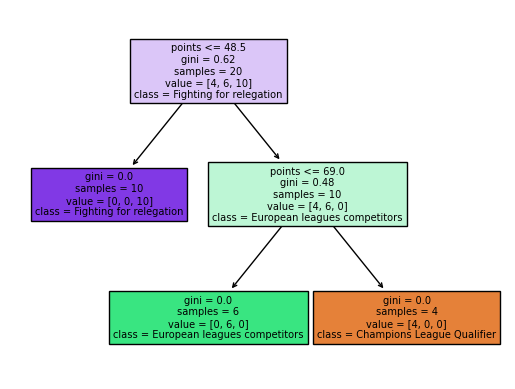

In [39]:
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

## Teams' performances at home and away

Many people says a team normally performs at home than away since the phenomenon aroused by their fans could be encouraging. Is it really the case?

With my math from Math 130A: Probability 1 class, I know the expected points received by a team from a match is 0 * 1/3 + 1 * 1/3 + 3 * 1/3 is 4/3, which is approximately 1.33. Using the new columns we create in df_matchday dataframe, we can calculate the mean points each team receives from a home game and an away game.

In [40]:
df_matchday["teams_home_points"].mean()

1.681578947368421

In [41]:
df_matchday["teams_away_points"].mean()

1.0894736842105264

Apparently the average points a team gets from a home game is much higher than that from an away game, so that it is more challenging for teams to perform better away than home. We want to continue to analyze if teams that perform better away results in higher points at the end of the season.

Now I want to see if the teams that perform better at away gets higher points at the end of the season.

First recall our teams_id_array contains all the indices of the teams, we make 20 sub dataframes, each corresponding to a team and containg all the team's away matches.

In [42]:
teams_id_array

array([52, 36, 35, 63, 46, 34, 47, 45, 33, 48, 42, 66, 55, 51, 49, 40, 50,
       65, 41, 39])

In [43]:
dataframes_away = []
for index in list(teams_id_array):
    df_sub = df_matchday[df_matchday["teams_away_id"] == index].copy()
    dataframes_away.append(df_sub)

Just take a look at one specific sub dataframe to see if it is really what we want.

In [44]:
dataframes_away[1]

,Unnamed: 0,fixture_id,fixture_date,teams_home_id,teams_home_name,teams_home_winner,teams_away_id,teams_away_name,teams_away_winner,goals_home,goals_away,teams_draw,teams_home_points,teams_away_points
19,19,867965,2022-08-13T14:00:00+00:00,39,Wolves,NaN,36,Fulham,NaN,0,0,True,1.0,1.0
30,30,867976,2022-08-27T16:30:00+00:00,42,Arsenal,True,36,Fulham,False,2,1,False,3.0,0.0
58,58,868004,2022-09-03T14:00:00+00:00,47,Tottenham,True,36,Fulham,False,2,1,False,3.0,0.0
77,77,868023,2022-09-16T19:00:00+00:00,65,Nottingham Forest,False,36,Fulham,True,2,3,False,0.0,3.0
99,99,868045,2022-10-09T13:00:00+00:00,48,West Ham,True,36,Fulham,False,3,1,False,3.0,0.0
123,123,868069,2022-10-23T13:00:00+00:00,63,Leeds,False,36,Fulham,True,2,3,False,0.0,3.0
144,144,868090,2022-11-05T15:00:00+00:00,50,Manchester City,True,36,Fulham,False,2,1,False,3.0,0.0
164,164,868110,2022-12-26T15:00:00+00:00,52,Crystal Palace,False,36,Fulham,True,0,3,False,0.0,3.0
187,187,868133,2023-01-03T19:45:00+00:00,46,Leicester,False,36,Fulham,True,0,1,False,0.0,3.0
196,196,868142,2023-01-15T14:00:00+00:00,34,Newcastle,True,36,Fulham,False,1,0,False,3.0,0.0


We only want to choose the "teams_away_id" and "teams_away_points" columns to make our prediction, so we first extract both columns to make a new dataframe.

In [45]:
sub_dataframe_away = dataframes_away[1][["teams_away_id", "teams_away_points"]]
sub_dataframe_away

,teams_away_id,teams_away_points
19,36,1.0
30,36,0.0
58,36,0.0
77,36,3.0
99,36,0.0
123,36,3.0
144,36,0.0
164,36,3.0
187,36,3.0
196,36,0.0


We want to reshape the dataframe so that the row is the id of the team and the column labels are match 1-19 (one team plays 19 away games and 19 home games each season). I use the pivot method in dataframes to have the match numbers as columns and reset the index to make the team IDs a column.

I refer to ChatGPT here to teach me about the pivot method as an extra component in my project.

In [46]:
sub_dataframe_away = sub_dataframe_away.copy()
sub_dataframe_away.loc[:, 'match_number'] = range(1, 20)
df_reshaped = sub_dataframe_away.pivot(index='teams_away_id', columns='match_number', values='teams_away_points')
df_reshaped = df_reshaped.reset_index()
df_reshaped.columns = ['team_id'] + list(range(1, 20))
df_reshaped.loc[:, 'team_id'] = df_reshaped['team_id']
df_reshaped

,team_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,36,1.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0


Above is how to perform the pivot method to reshape one of the teams. I use a for loop below iterating over the indices in the dataframes_away list to make 20 sub dataframes like the one above. Then I use pd.concat method to combine all 20 sub dataframes into one dataframe.

In [47]:
processed_dataframes = []

# Loop over each dataframe in your list
for idx, df in enumerate(dataframes_away):
    sub_dataframe_away = df[["teams_away_id", "teams_away_points"]].copy()
    sub_dataframe_away.loc[:, 'match_number'] = range(1, 20)

    # Pivot the dataframe to have the match numbers as columns
    df_reshaped = sub_dataframe_away.pivot(index='teams_away_id', columns='match_number', values='teams_away_points')

    # Reset the index to make the team IDs a column
    df_reshaped = df_reshaped.reset_index()

    # Rename the columns to have the y labels from 1 to 19
    df_reshaped.columns = ['team_id'] + list(range(1, 20))
    df_reshaped.loc[:, 'team_id'] = df_reshaped['team_id']
    
    # Append the reshaped dataframe to the list
    processed_dataframes.append(df_reshaped)

# Concatenate all processed dataframes
final_df = pd.concat(processed_dataframes, ignore_index=True)
final_df

,team_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,52,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0
1,36,1.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
2,35,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0
3,63,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,46,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,34,1.0,1.0,0.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,3.0,1.0,1.0
6,47,1.0,3.0,1.0,0.0,0.0,3.0,0.0,3.0,1.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0
7,45,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0
8,33,0.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0
9,48,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0


I combine final_df to df_standing to fit the away data above to predict the final result. 

In [48]:
combined_df_away_result = pd.concat([final_df, df_standing], axis=1)
combined_df_away_result

,team_id,1,2,3,4,5,6,7,8,9,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,52,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,...,1,1,60,17,19,11,4,4,34,16
1,36,1.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,...,3,2,53,25,19,12,3,4,35,18
2,35,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3,1,36,10,19,8,3,8,22,33
3,63,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,...,6,2,36,14,19,8,8,3,32,19
4,46,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,...,5,1,46,17,19,6,5,8,29,30
5,34,1.0,1.0,0.0,3.0,3.0,1.0,3.0,3.0,3.0,...,4,5,37,21,19,8,4,7,35,32
6,47,1.0,3.0,1.0,0.0,0.0,3.0,0.0,3.0,1.0,...,2,5,33,21,19,6,5,8,18,25
7,45,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,...,1,6,37,25,19,6,5,8,33,38
8,33,0.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,3.0,...,7,2,35,18,19,5,7,7,23,28
9,48,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5,6,31,29,19,7,2,10,24,24


In [49]:
X = combined_df_away_result.iloc[:, 1:20]
y = combined_df_away_result[['points']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
clf = LogisticRegression()

In [52]:
clf.fit(X, y.values.ravel())

LogisticRegression()

In [53]:
clf.score(X_test, y_test)

1.0

In [54]:
combined_df_away_result['predicted_result'] = clf.predict(X)

In [55]:
combined_df_away_result[['points', 'predicted_result']]

,points,predicted_result
0,89,89
1,84,84
2,75,75
3,71,71
4,67,67
5,62,62
6,61,61
7,60,60
8,59,59
9,52,52


Incredibly my above data has a score of 1.0 under LogisticRegressiom, which is a sign of overfitting. I think even though the answer suggests that better performance away does suggest better points at the end of the season, there might be some problems in fitting my data. I have three explanations for this problem: 1) the test size might be too small since it only contains 20 sets of data 2) I might have mistakenly leak the test data to train the data 3) It is also possible that the dataset is not difficult to learn.

## Predicting match results using df_home data

Then I want to find if the home team results can be predicted using logistic regression. 

I first combine the df_matchday and df_home dataframesusing pd.concat. Then I choose some of the useful columns ('Shots on Goal', 'Shots off Goal', 'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox', 'Corner Kicks', 'Offsides') from the df_matchday dataframe to predict the "teams_home_points" column in df_home. I drop the rows which contain "nan" in those columns.

In [56]:
combined_df_matchday = pd.concat([df_home, df_matchday], axis=1)
combined_df_matchday.dropna(subset=['Shots on Goal', 'Shots off Goal', 'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox', 'Corner Kicks', 'Offsides'], inplace=True)
combined_df_matchday

,fixture id,Home team id,Home team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,...,teams_home_name,teams_home_winner,teams_away_id,teams_away_name,teams_away_winner,goals_home,goals_away,teams_draw,teams_home_points,teams_away_points
0,867946,52,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,...,Crystal Palace,False,42,Arsenal,True,0,2,False,0.0,3.0
1,867947,36,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,...,Fulham,NaN,40,Liverpool,NaN,2,2,True,1.0,1.0
2,867948,35,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,...,Bournemouth,True,66,Aston Villa,False,2,0,False,3.0,0.0
4,867950,46,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,...,Leicester,NaN,55,Brentford,NaN,2,2,True,1.0,1.0
5,867951,34,Newcastle,10.0,8.0,23,5.0,16.0,7.0,9,...,Newcastle,True,65,Nottingham Forest,False,2,0,False,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,868319,49,Chelsea,5.0,9.0,22,8.0,13.0,9.0,9,...,Chelsea,NaN,34,Newcastle,NaN,1,1,True,1.0,1.0
374,868320,52,Crystal Palace,3.0,8.0,15,4.0,9.0,6.0,9,...,Crystal Palace,NaN,65,Nottingham Forest,NaN,1,1,True,1.0,1.0
376,868322,63,Leeds,2.0,7.0,19,10.0,14.0,5.0,8,...,Leeds,False,47,Tottenham,True,1,4,False,0.0,3.0
377,868323,46,Leicester,4.0,6.0,13,3.0,8.0,5.0,8,...,Leicester,True,48,West Ham,False,2,1,False,3.0,0.0


In [57]:
X = combined_df_matchday[['Shots on Goal', 'Shots off Goal', 'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox', 'Corner Kicks', 'Offsides']]
y = combined_df_matchday[['teams_home_points']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
clf = LogisticRegression(max_iter=500)

In [60]:
clf.fit(X, y.values.ravel())

LogisticRegression(max_iter=500)

We can see in the score of the prediction is not high (only above 50 percent), which means that football matches are unpredictable.

In [61]:
clf.score(X, y)

0.5338078291814946

From the coefficients below we can see that "shots on goal"'s influence on the final result is the greatest, while other factors have fluctuating importance.

In [62]:
clf.coef_

array([[-1.50886102e-01,  3.00392034e-02, -3.33541894e-02,
         8.74927091e-02, -2.45592879e-02, -8.79490146e-03,
         1.93229115e-02, -7.55692733e-02],
       [-2.60558822e-02,  4.86229868e-02,  1.25542066e-02,
        -1.00128981e-02, -2.38983995e-02,  3.64526061e-02,
        -9.08832105e-05,  7.93281577e-02],
       [ 1.76941984e-01, -7.86621902e-02,  2.07999828e-02,
        -7.74798110e-02,  4.84576875e-02, -2.76577046e-02,
        -1.92320283e-02, -3.75888439e-03]])

The classifier identifies three different classes from training the data. It can provide unique class labels present in the dataset.

In [63]:
clf.classes_

array([0., 1., 3.])

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

In this project I mainly summarize the dataset of premier league season 2022-23. I make dataframes and draw figures of teams' overall performances and points related to matches. In addition, I also try to fit and predict the distribution of overall data to cluster the teams and predict the results of matches and final performances using LogisticRegression. I refer to outside references to learn about extra ideas such as Kmeans, seaborn, and pivot method to better analyze my data. My result summarizes and better visualizes the teams' performance and shows some predictable and unpredictable elements in soccer.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

My source is from the following website with URL https://www.kaggle.com/datasets/afnanurrahim/premier-league-2022-23

* List any other references that you found helpful.

1. Previous students' work such as Songhan (Hanson) Hu's project (this one teaches me about how to better use Kmeans method) from Spring 2022 with URL https://christopherdavisuci.github.io/UCI-Math-10-S22/Proj/StudentProjects/SonghanHu.
2. Premier league final report telling me about team's possible classification such as the URL https://www.sportingnews.com/us/soccer/news/english-premier-league-table-2022-23-updated-epl-standings/jh3khedtjm3bbxccudntwq9h
3. ChatGPT that helps me debug and teach me about pivot method.

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1970745-733b-49df-a86d-fba81b005f4e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>